In [1]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import graphviz 

In [ ]:
plt.figure(figsize=(20, 20))
ax = plt.axes()
ax.axes.get_xaxis().set_visible(False)
new_data['Predictions'] = cp1
plt.plot(new_data['price_usd_high'])
plt.gca().invert_xaxis()
plt.plot(new_data['Predictions'])
plt.legend(['train', 'prediction'])
plt.ylabel('Amount')
plt.xlabel('Date')
plt.suptitle('High Price Prediction - 2018')
plt.show()

### 2017 Predictions

In [2]:
data = pd.read_csv('/Users/rachelzhu/Redblock/CrypotQuant_BTC_20170817-20171231.csv')
data = data.iloc[::-1].reset_index(drop=True)
# data

In [3]:
new_data = data[['date', 'price_usd_low', 'price_usd_open', 'price_usd_close', 'market_cap', 'realized_cap', 'Exchange_flow_reserve_usd', 
          'velocity_supply_total', 'miner_flow_reserve_usd', 'stock_to_flow_reversion',
     'blockreward_usd', 'thermo_cap', 'delta_cap', 'supply_total', 'average_cap', 'utxo_count',]]

new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)
# new_data

/Users/rachelzhu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [4]:
dataset = new_data.values
y_dataset = new_data[['price_usd_low']].values

train = dataset[0:109] #(109, 13)
valid = dataset[109:]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

y_scaler = MinMaxScaler()

dataY = y_scaler.fit_transform(y_dataset)

In [5]:
len(new_data.iloc[1])

15

In [5]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train, y_train
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],15))

In [6]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],15)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [7]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.0043
Epoch 2/20
49/49 - 1s - loss: 0.0011
Epoch 3/20
49/49 - 1s - loss: 0.0022
Epoch 4/20
49/49 - 1s - loss: 0.0012
Epoch 5/20
49/49 - 1s - loss: 0.0015
Epoch 6/20
49/49 - 1s - loss: 0.0013
Epoch 7/20
49/49 - 2s - loss: 0.0012
Epoch 8/20
49/49 - 1s - loss: 0.0017
Epoch 9/20
49/49 - 1s - loss: 0.0011
Epoch 10/20
49/49 - 1s - loss: 0.0014
Epoch 11/20
49/49 - 1s - loss: 8.8500e-04
Epoch 12/20
49/49 - 1s - loss: 0.0012
Epoch 13/20
49/49 - 1s - loss: 6.9335e-04
Epoch 14/20
49/49 - 1s - loss: 7.3197e-04
Epoch 15/20
49/49 - 1s - loss: 7.1499e-04
Epoch 16/20
49/49 - 1s - loss: 0.0011
Epoch 17/20
49/49 - 1s - loss: 7.4863e-04
Epoch 18/20
49/49 - 1s - loss: 0.0013
Epoch 19/20
49/49 - 2s - loss: 6.0394e-04
Epoch 20/20
49/49 - 1s - loss: 5.2797e-04


In [8]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs #(88, 13)
inputs  = scaler.transform(inputs)

In [9]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],15))
X_test.shape #(28, 60, 13)
closing_price = model.predict(X_test)

closing_price = y_scaler.inverse_transform(closing_price)

<ipython-input-10-828a7f47f087>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


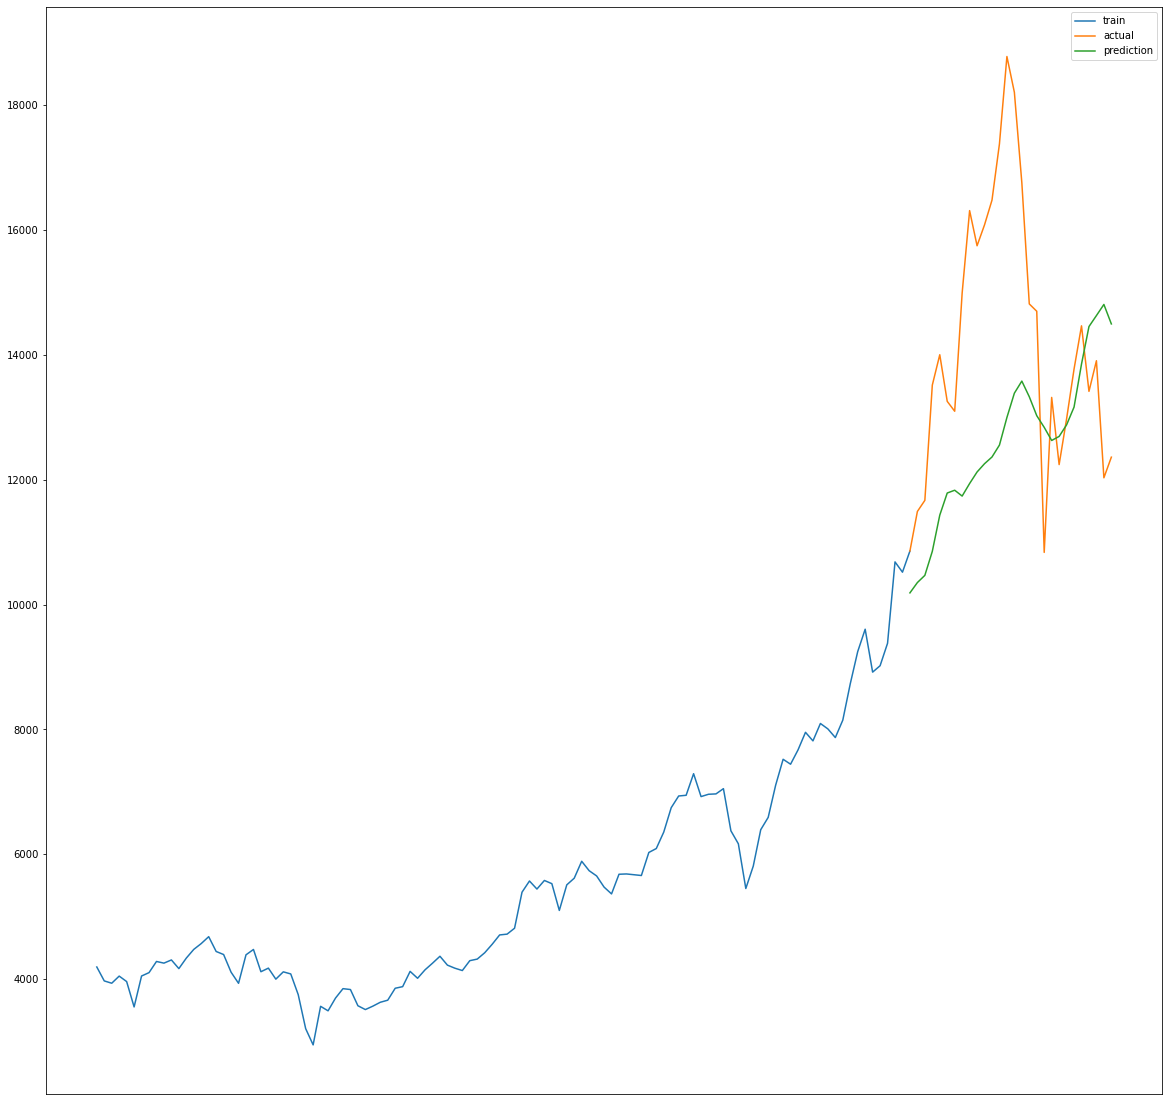

In [10]:
plt.figure(figsize=(20, 20))
ax = plt.axes()
ax.axes.get_xaxis().set_visible(False)
train = new_data[:110]
valid = new_data[109:]
valid['Predictions'] = closing_price
plt.plot(train['price_usd_low'])
plt.plot(valid[['price_usd_low','Predictions']])
plt.legend(['train', 'actual', 'prediction'])
plt.show()

In [11]:
#Prediction High Price.
new_data = data[['date', 'price_usd_high', 'price_usd_open', 'price_usd_close', 'market_cap', 'realized_cap', 'Exchange_flow_reserve_usd', 
          'velocity_supply_total', 'miner_flow_reserve_usd', 'stock_to_flow_reversion',
     'blockreward_usd', 'thermo_cap', 'delta_cap', 'supply_total', 'average_cap', 'utxo_count',]]

# new_data = new_data.iloc[::-1].reset_index(drop=True)
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

y_dataset = new_data[['price_usd_high']].values

inputs = new_data.values
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)

closing_price = model.predict(X_test)
closing_price = y_scaler.inverse_transform(closing_price)

cp1 = []
for i in range(1, len(closing_price) + 1):
    cp1.append(list(closing_price[-i]))
# cp1

/Users/rachelzhu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
new_data = data[['date', 'price_usd_high', 'price_usd_open', 'price_usd_close', 'market_cap', 'realized_cap', 'Exchange_flow_reserve_usd', 
          'velocity_supply_total', 'miner_flow_reserve_usd', 'stock_to_flow_reversion',
     'blockreward_usd', 'thermo_cap', 'delta_cap', 'supply_total', 'average_cap', 'utxo_count',]]

new_data = new_data.iloc[::-1].reset_index(drop=True)
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

y_dataset = new_data[['price_usd_high']].values

inputs = new_data.values
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)

closing_price = model.predict(X_test)
closing_price = y_scaler.inverse_transform(closing_price)

cp2 = []
for i in closing_price:
    cp2.append(list(i))
# cp2

In [13]:
cp1.extend(cp2[17:])
cp1 = np.array(cp1)

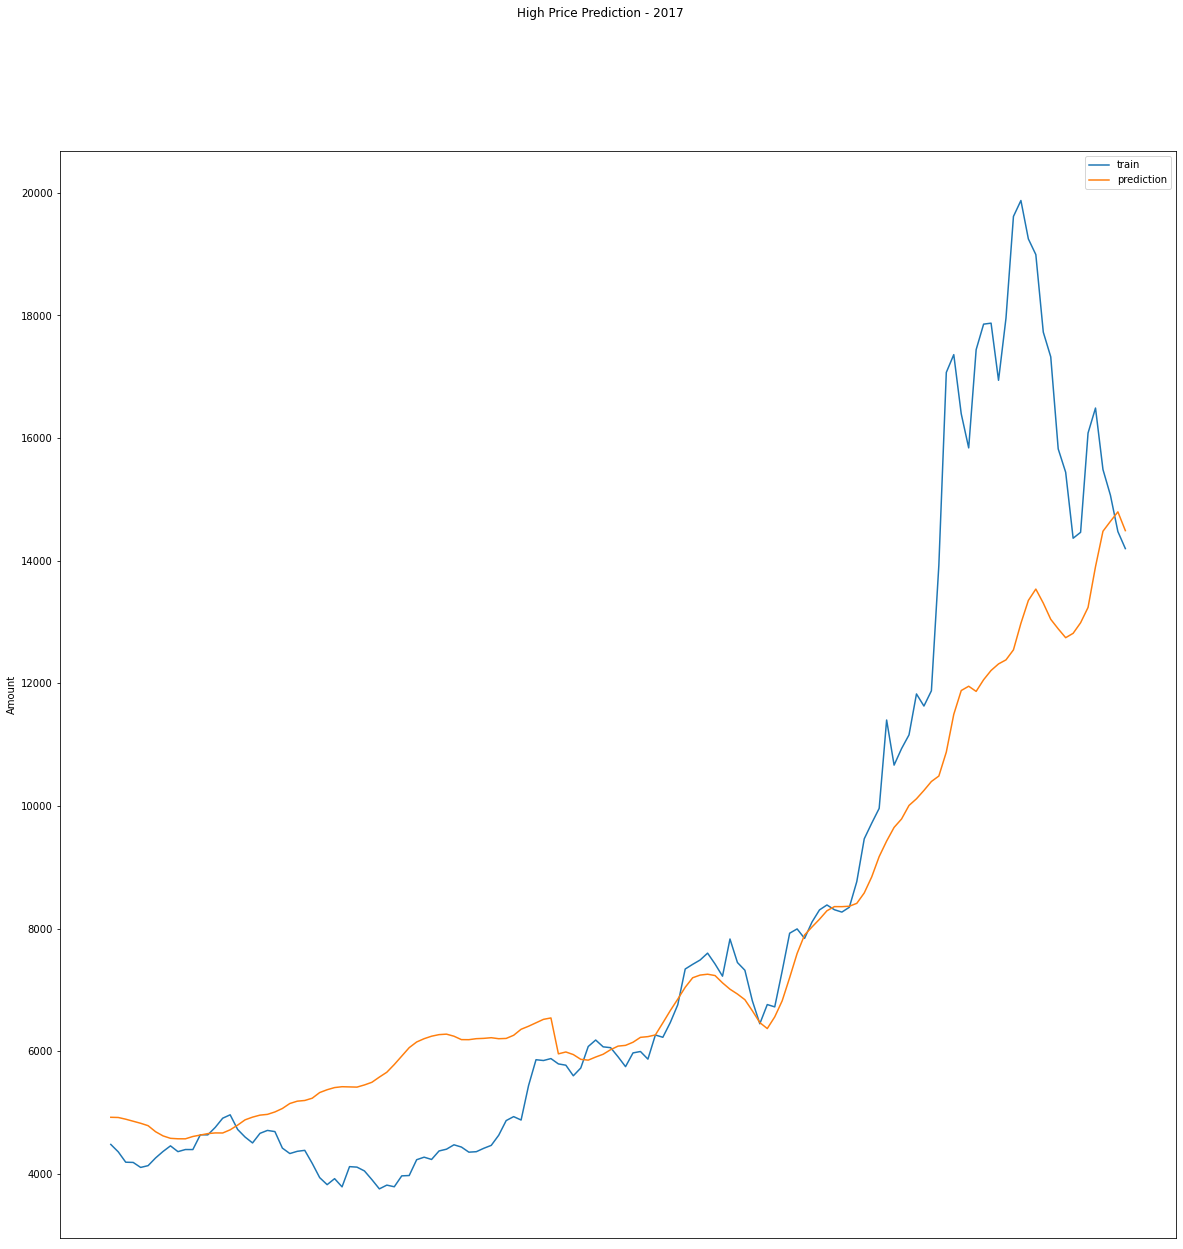

In [14]:
plt.figure(figsize=(20, 20))
ax = plt.axes()
ax.axes.get_xaxis().set_visible(False)
new_data['Predictions'] = cp1
plt.plot(new_data['price_usd_high'])
plt.plot(new_data['Predictions'])
plt.legend(['train', 'prediction'])
plt.gca().invert_xaxis()
plt.ylabel('Amount')
plt.xlabel('Date')
plt.suptitle('High Price Prediction - 2017')
plt.show()

### 2018 Prediction

In [15]:
data = pd.read_csv('/Users/rachelzhu/Redblock/CrypotQuant_BTC_20180101-20181231.csv')
data = data.iloc[::-1].reset_index(drop=True)
# data

In [16]:
new_data = data[['date', 'price_usd_low', 'price_usd_open', 'price_usd_close',  
          'stablecoin_supply_ratio', 'market_cap', 'realized_cap', 'mvrv', 'Exchange_flow_reserve_usd', 
          'Exchange_flow_inflow_mean_ma7', 'miner_flow_reserve_usd', 'stock_to_flow_reversion',
     'blockreward_usd', 'thermo_cap', 'supply_total', 'average_cap', 'velocity_supply_total', 'delta_cap']]

new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)
# new_data

/Users/rachelzhu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
dataset = new_data.values
y_dataset = new_data[['price_usd_low']].values

train = dataset[0:148] #(109, 13)
valid = dataset[148:]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

y_scaler = MinMaxScaler()

dataY = y_scaler.fit_transform(y_dataset)

In [18]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train, y_train
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],17))

In [19]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],17)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [20]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
88/88 - 2s - loss: 0.0154
Epoch 2/20
88/88 - 2s - loss: 0.0074
Epoch 3/20
88/88 - 2s - loss: 0.0085
Epoch 4/20
88/88 - 2s - loss: 0.0069
Epoch 5/20
88/88 - 2s - loss: 0.0040
Epoch 6/20
88/88 - 2s - loss: 0.0032
Epoch 7/20
88/88 - 2s - loss: 0.0029
Epoch 8/20
88/88 - 2s - loss: 0.0026
Epoch 9/20
88/88 - 2s - loss: 0.0032
Epoch 10/20
88/88 - 2s - loss: 0.0031
Epoch 11/20
88/88 - 2s - loss: 0.0027
Epoch 12/20
88/88 - 2s - loss: 0.0024
Epoch 13/20
88/88 - 2s - loss: 0.0023
Epoch 14/20
88/88 - 2s - loss: 0.0025
Epoch 15/20
88/88 - 2s - loss: 0.0025
Epoch 16/20
88/88 - 2s - loss: 0.0023
Epoch 17/20
88/88 - 2s - loss: 0.0022
Epoch 18/20
88/88 - 2s - loss: 0.0022
Epoch 19/20
88/88 - 2s - loss: 0.0023
Epoch 20/20
88/88 - 3s - loss: 0.0023


In [21]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs #(88, 13)
inputs  = scaler.transform(inputs)

In [22]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],17))
X_test.shape #(28, 60, 13)
closing_price = model.predict(X_test)

closing_price = y_scaler.inverse_transform(closing_price)

<ipython-input-23-b8dbb56f31b7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


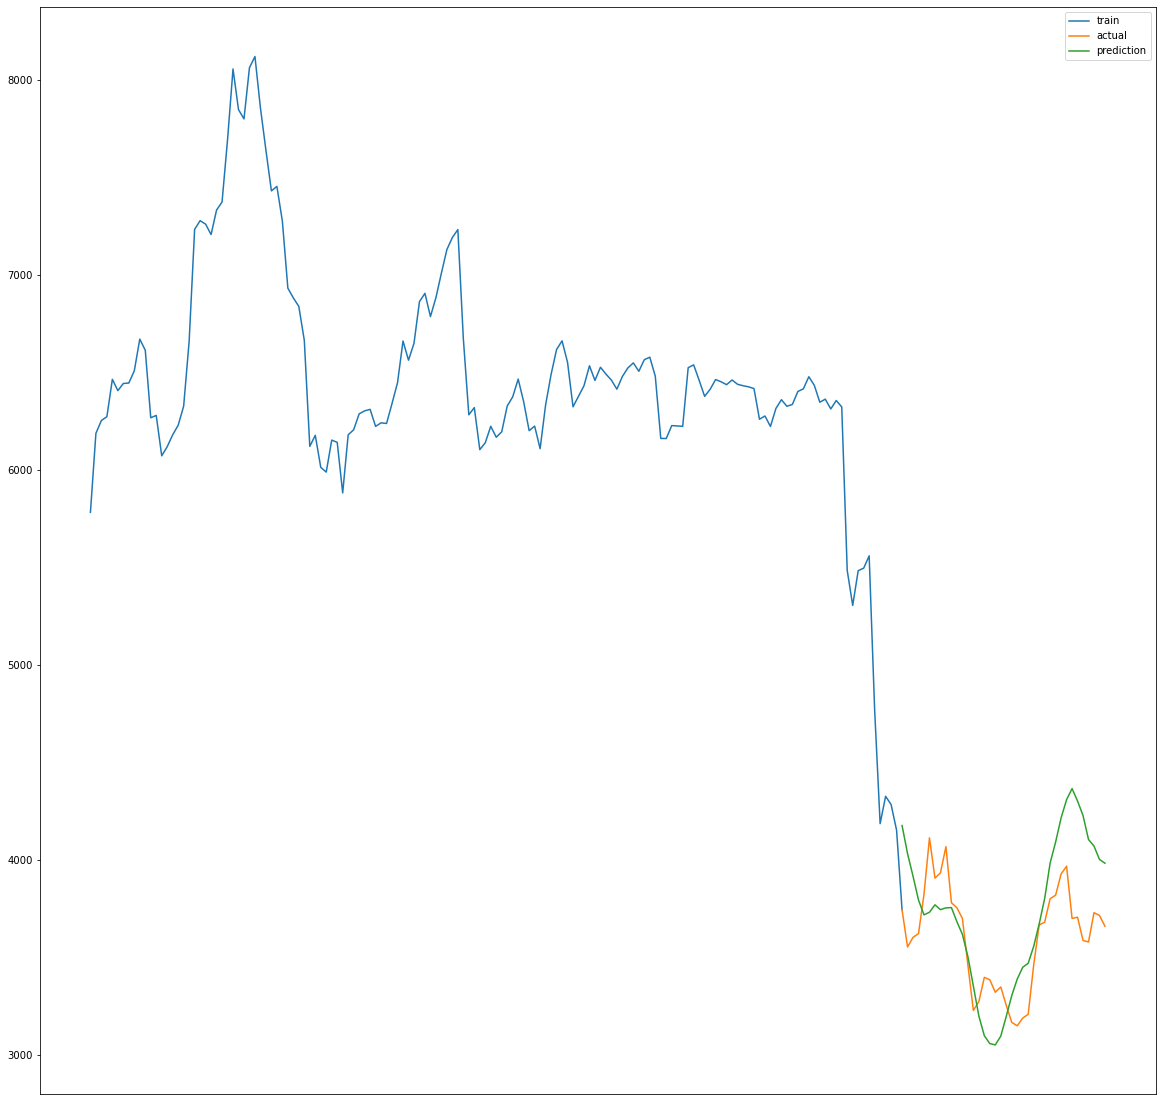

In [23]:
plt.figure(figsize=(20, 20))
ax = plt.axes()
ax.axes.get_xaxis().set_visible(False)
train = new_data[:149]
valid = new_data[148:]
valid['Predictions'] = closing_price
plt.plot(train['price_usd_low'])
plt.plot(valid[['price_usd_low','Predictions']])
plt.legend(['train', 'actual', 'prediction'])
plt.show()

In [24]:
new_data = data[['date', 'price_usd_high', 'price_usd_open', 'price_usd_close',  
          'stablecoin_supply_ratio', 'market_cap', 'realized_cap', 'mvrv', 'Exchange_flow_reserve_usd', 
          'Exchange_flow_inflow_mean_ma7', 'miner_flow_reserve_usd', 'stock_to_flow_reversion',
     'blockreward_usd', 'thermo_cap', 'supply_total', 'average_cap', 'velocity_supply_total', 'delta_cap']]

new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

y_dataset = new_data[['price_usd_high']].values

inputs = new_data.values
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)

closing_price = model.predict(X_test)
closing_price = y_scaler.inverse_transform(closing_price)

cp1 = []
for i in range(1, len(closing_price) + 1):
    cp1.append(list(closing_price[-i]))
# cp1

/Users/rachelzhu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
new_data = data[['date', 'price_usd_high', 'price_usd_open', 'price_usd_close',  
          'stablecoin_supply_ratio', 'market_cap', 'realized_cap', 'mvrv', 'Exchange_flow_reserve_usd', 
          'Exchange_flow_inflow_mean_ma7', 'miner_flow_reserve_usd', 'stock_to_flow_reversion',
     'blockreward_usd', 'thermo_cap', 'supply_total', 'average_cap', 'velocity_supply_total', 'delta_cap']]

new_data = new_data.iloc[::-1].reset_index(drop=True)
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

y_dataset = new_data[['price_usd_high']].values

inputs = new_data.values
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)

closing_price = model.predict(X_test)
closing_price = y_scaler.inverse_transform(closing_price)

cp2 = []
for i in closing_price:
    cp2.append(list(i))
# cp2[:66]

In [26]:
cp1.extend(cp2[66:])
cp1 = np.array(cp1)

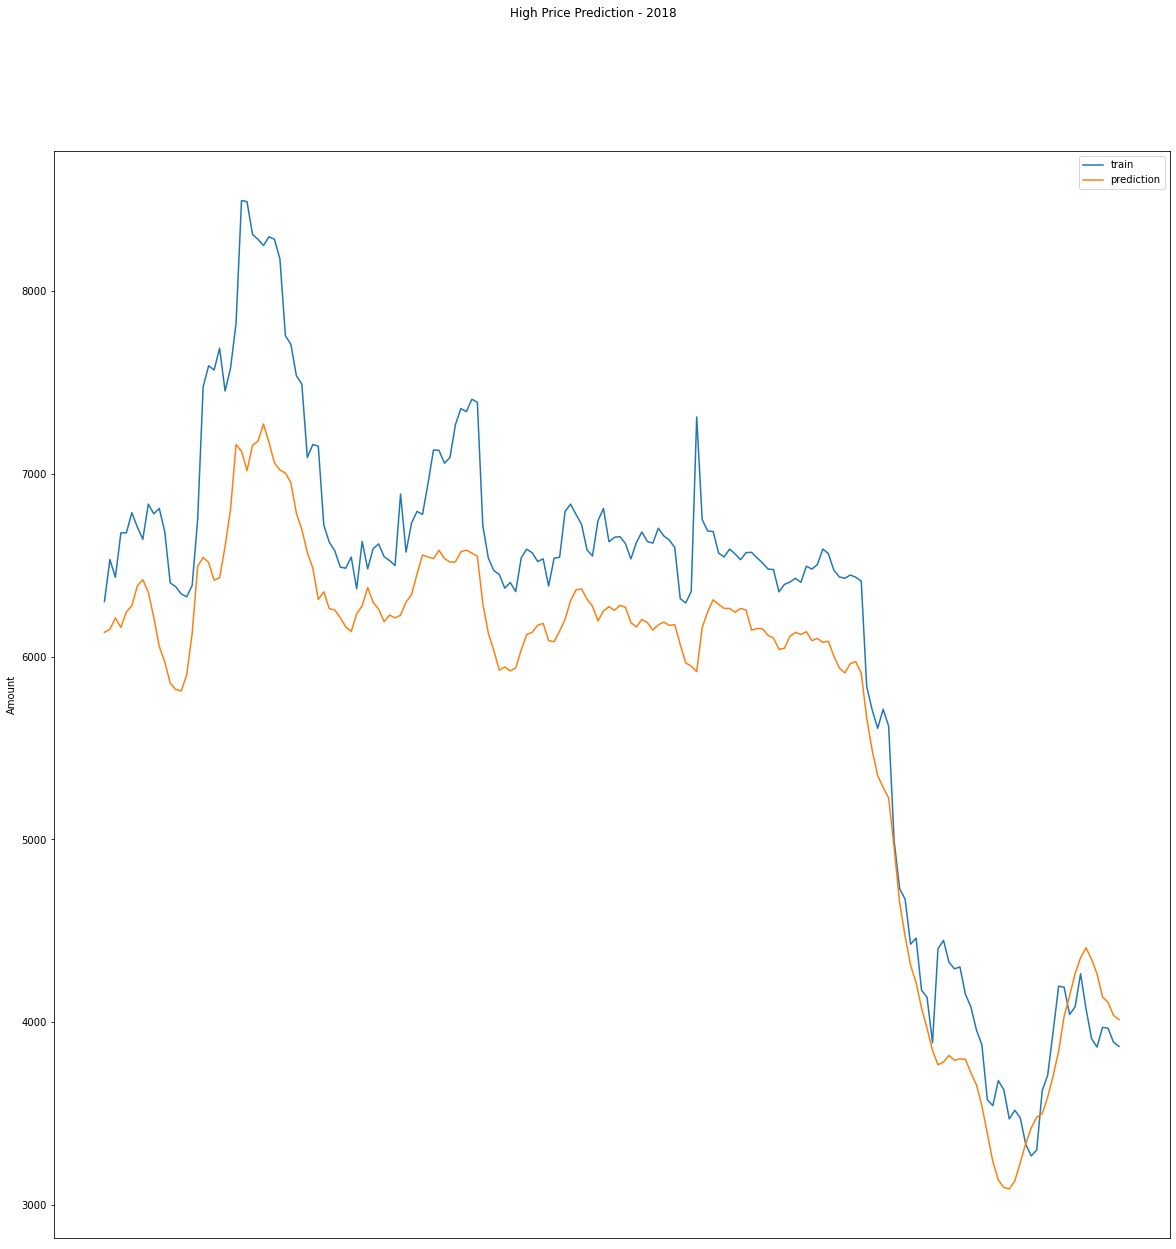

In [27]:
plt.figure(figsize=(20, 20))
ax = plt.axes()
ax.axes.get_xaxis().set_visible(False)
new_data['Predictions'] = cp1
plt.plot(new_data['price_usd_high'])
plt.gca().invert_xaxis()
plt.plot(new_data['Predictions'])
plt.legend(['train', 'prediction'])
plt.ylabel('Amount')
plt.xlabel('Date')
plt.suptitle('High Price Prediction - 2018')
plt.show()

### 2019 Prediction

In [28]:
data = pd.read_csv('/Users/rachelzhu/Redblock/CrypotQuant_BTC_20190101-20200229.csv')
data = data.iloc[::-1].reset_index(drop=True)
# data

In [29]:
#Prediction Low Price.
new_data = data[['date', 'price_usd_low', 'price_usd_open', 'price_usd_close',  
          'stablecoin_supply_ratio', 'market_cap', 'realized_cap', 'mvrv', 'Exchange_flow_reserve_usd', 
          'Exchange_flow_inflow_mean_ma7', 'miner_flow_reserve_usd', 'stock_to_flow_reversion',
     'blockreward_usd', 'thermo_cap', 'supply_total', 'average_cap', 'velocity_supply_total', 'delta_cap']]

new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)
len(new_data.iloc[1])
y_dataset = new_data[['price_usd_low']].values

inputs = new_data.values
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)

closing_price = model.predict(X_test)
closing_price = y_scaler.inverse_transform(closing_price)

cp1 = []
for i in range(1, len(closing_price) + 1):
    cp1.append(list(closing_price[-i]))
# cp1

/Users/rachelzhu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
new_data = data[['date', 'price_usd_low', 'price_usd_open', 'price_usd_close',  
          'stablecoin_supply_ratio', 'market_cap', 'realized_cap', 'mvrv', 'Exchange_flow_reserve_usd', 
          'Exchange_flow_inflow_mean_ma7', 'miner_flow_reserve_usd', 'stock_to_flow_reversion',
     'blockreward_usd', 'thermo_cap', 'supply_total', 'average_cap', 'velocity_supply_total', 'delta_cap']]

new_data = new_data.iloc[::-1].reset_index(drop=True)
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

y_dataset = new_data[['price_usd_low']].values

inputs = new_data.values
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)

closing_price = model.predict(X_test)
closing_price = y_scaler.inverse_transform(closing_price)

cp2 = []
for i in closing_price:
    cp2.append(list(i))
# cp2[:66]

In [31]:
cp1.extend(cp2[305:])

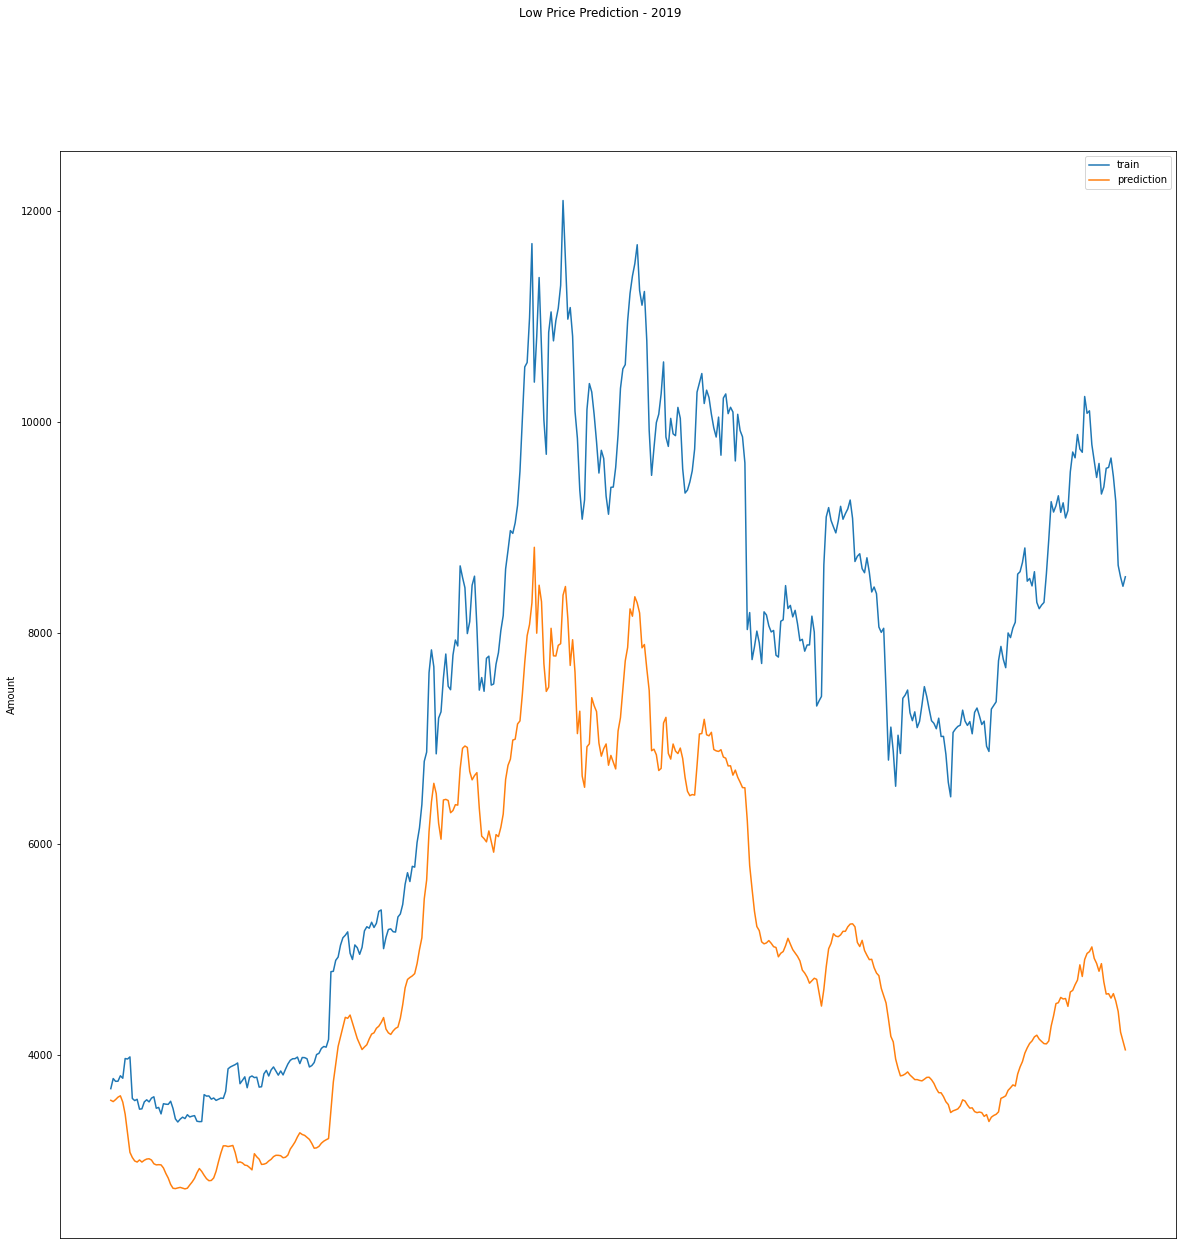

In [32]:
cp1 = np.array(cp1)
plt.figure(figsize=(20, 20))
ax = plt.axes()
ax.axes.get_xaxis().set_visible(False)
new_data['Predictions'] = cp1
plt.plot(new_data['price_usd_low'])
plt.plot(new_data['Predictions'])
plt.legend(['train', 'prediction'])
plt.gca().invert_xaxis()
plt.ylabel('Amount')
plt.xlabel('Date')
plt.suptitle('Low Price Prediction - 2019')
plt.show()

### 2020 Prediction

In [33]:
data = pd.read_csv('/Users/rachelzhu/Redblock/CrypotQuant_BTC_20200301-20200820.csv')
data = data.iloc[::-1].reset_index(drop=True)
# data

In [34]:
#Prediction Low Price.
new_data = data[['date', 'price_usd_low', 'price_usd_open', 'price_usd_close',  
          'stablecoin_supply_ratio', 'market_cap', 'realized_cap', 'mvrv', 'Exchange_flow_reserve_usd', 
          'Exchange_flow_inflow_mean_ma7', 'miner_flow_reserve_usd', 'stock_to_flow_reversion',
     'blockreward_usd', 'thermo_cap', 'supply_total', 'average_cap', 'velocity_supply_total', 'delta_cap']]

new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

y_dataset = new_data[['price_usd_low']].values

inputs = new_data.values
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)

closing_price = model.predict(X_test)
closing_price = y_scaler.inverse_transform(closing_price)

cp1 = []
for i in range(1, len(closing_price) + 1):
    cp1.append(list(closing_price[-i]))
# cp1

/Users/rachelzhu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
new_data = data[['date', 'price_usd_low', 'price_usd_open', 'price_usd_close',  
          'stablecoin_supply_ratio', 'market_cap', 'realized_cap', 'mvrv', 'Exchange_flow_reserve_usd', 
          'Exchange_flow_inflow_mean_ma7', 'miner_flow_reserve_usd', 'stock_to_flow_reversion',
     'blockreward_usd', 'thermo_cap', 'supply_total', 'average_cap', 'velocity_supply_total', 'delta_cap']]

new_data = new_data.iloc[::-1].reset_index(drop=True)
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

y_dataset = new_data[['price_usd_low']].values

inputs = new_data.values
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)

closing_price = model.predict(X_test)
closing_price = y_scaler.inverse_transform(closing_price)

cp2 = []
for i in closing_price:
    cp2.append(list(i))
# cp2[:66]

In [36]:
cp1.extend(cp2[53:])

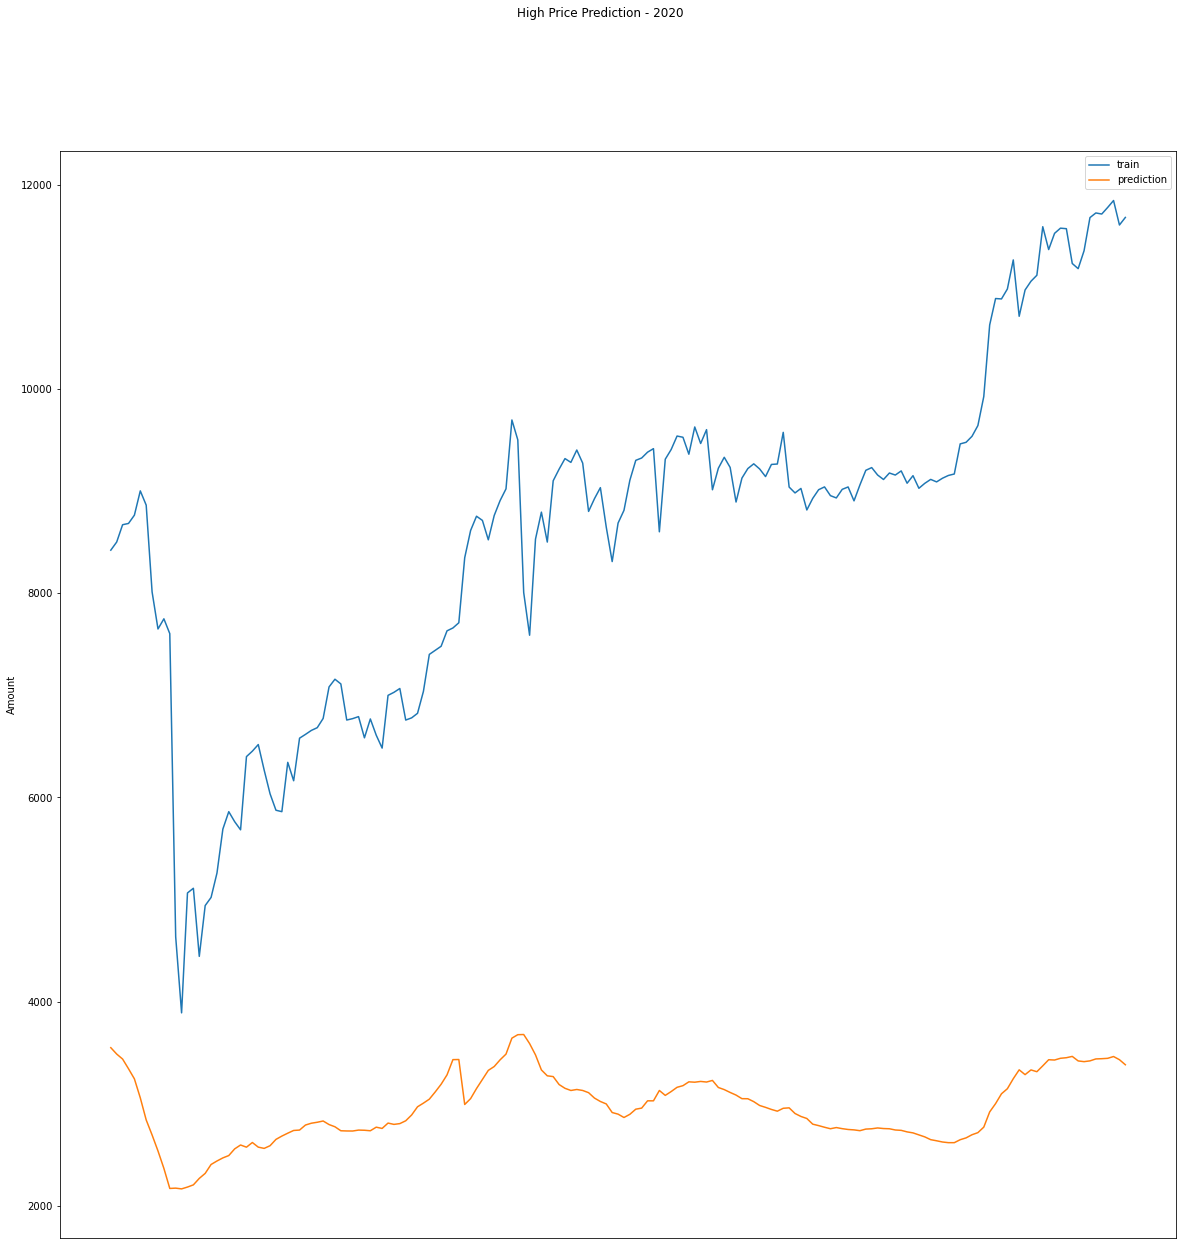

In [37]:
cp1 = np.array(cp1)
plt.figure(figsize=(20, 20))
ax = plt.axes()
ax.axes.get_xaxis().set_visible(False)
new_data['Predictions'] = cp1
plt.plot(new_data['price_usd_low'])
plt.plot(new_data['Predictions'])
plt.legend(['train', 'prediction'])
plt.gca().invert_xaxis()
plt.ylabel('Amount')
plt.xlabel('Date')
plt.suptitle('High Price Prediction - 2020')
plt.show()